In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE  = 256
BATCH_SIZE  = 32
CHANNELS = 3
EPOCHS = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size =(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 0 1 1 1 1 0 0 1 0 0 0 0 2 0 1 1 1 0 0 0 0 0 1 2 0 1 0 0 1 1]


(256, 256, 3)


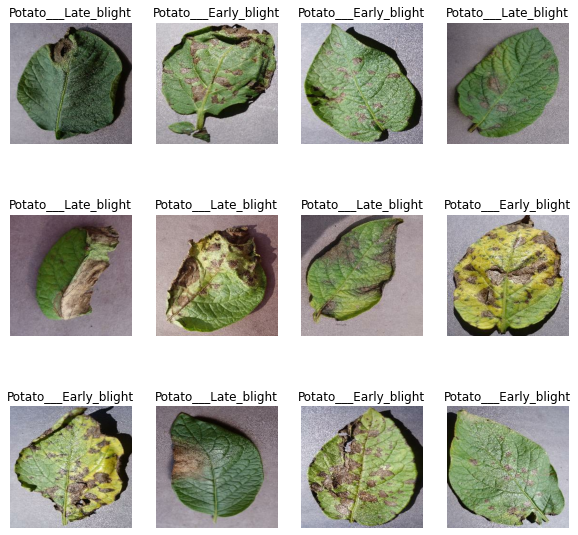

In [8]:
#print(image_batch[0].numpy())
print(image_batch[0].shape)
plt.figure(figsize=(10,10))
for i in range(12):    
    plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [9]:
len(dataset)

68

In [10]:
train_size = 0.8
len(dataset) *train_size

54.400000000000006

In [11]:
train_dataset = dataset.take(54)
len(train_dataset)

54

In [12]:
test_validation_dataset = dataset.skip(54) 
len(test_validation_dataset)

14

In [13]:
validation_size = 0.1
len(dataset)*validation_size

6.800000000000001

In [14]:
validation_dataset = test_validation_dataset.take(6)
len(validation_dataset)

6

In [15]:
test_dataset = test_validation_dataset.skip(6)
len(test_dataset)

8

In [16]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_dataset = ds.take(train_size)    
    validation_dataset = ds.skip(train_size).take(val_size)
    test_dataset = ds.skip(train_size).skip(val_size)
    
    return train_dataset, validation_dataset, test_dataset

In [17]:
train_dataset, validation_dataset, test_dataset = get_dataset_partitions_tf(dataset)

In [18]:
len(train_dataset)

54

In [19]:
len(validation_dataset)

6

In [20]:
len(test_dataset)

8

In [21]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [23]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [24]:
input_shape=(BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (32, 30, 30, 64)         

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_dataset,
    batch_size=BATCH_SIZE,
    validation_data=validation_dataset,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 41s 744ms/step - loss: 0.8749 - accuracy: 0.5023 - val_loss: 0.6519 - val_accuracy: 0.6823
Epoch 2/50
54/54 [==============================] - 39s 725ms/step - loss: 0.5794 - accuracy: 0.7321 - val_loss: 0.4502 - val_accuracy: 0.8229
Epoch 3/50
54/54 [==============================] - 40s 740ms/step - loss: 0.4132 - accuracy: 0.8316 - val_loss: 0.2591 - val_accuracy: 0.9271
Epoch 4/50
54/54 [==============================] - 41s 752ms/step - loss: 0.2614 - accuracy: 0.8958 - val_loss: 0.3600 - val_accuracy: 0.8385
Epoch 5/50
54/54 [==============================] - 40s 744ms/step - loss: 0.2147 - accuracy: 0.9132 - val_loss: 0.2198 - val_accuracy: 0.9062
Epoch 6/50
54/54 [==============================] - 40s 739ms/step - loss: 0.1529 - accuracy: 0.9433 - val_loss: 0.2050 - val_accuracy: 0.9167
Epoch 7/50
54/54 [==============================] - 40s 747ms/step - loss: 0.1836 - accuracy: 0.9294 - val_loss: 0.0971 - val_accuracy: 0.9688

In [28]:
scores = model.evaluate(test_dataset)
scores

8/8 [==============================] - 2s 167ms/step - loss: 0.0461 - accuracy: 0.9922


[0.04609331488609314, 0.9921875]

Actual Label    :  Potato___healthy
Predicted Label :  Potato___healthy


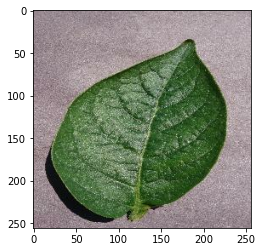

In [70]:
import numpy as np
for images_batch, labels_batch in test_dataset.take(1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))
    print("Actual Label    : ",class_names[labels_batch[0].numpy()])
    
    batch_predication = model.predict(images_batch)
    print("Predicted Label : ",class_names[np.argmax(batch_predication[0])])

In [30]:
model_version = 3
model.save(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../saved_models/3\assets


In [71]:
model.save("../VegDisIdentifier.h5")